# Testing Script

Test whether the various ML interpretability methods within MintPy are functioning correctly. 

In [1]:
import sys, os 
path = os.path.dirname(os.getcwd())
sys.path.append(path)

In [2]:
import mintpy
import plotting_config
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.impute import SimpleImputer

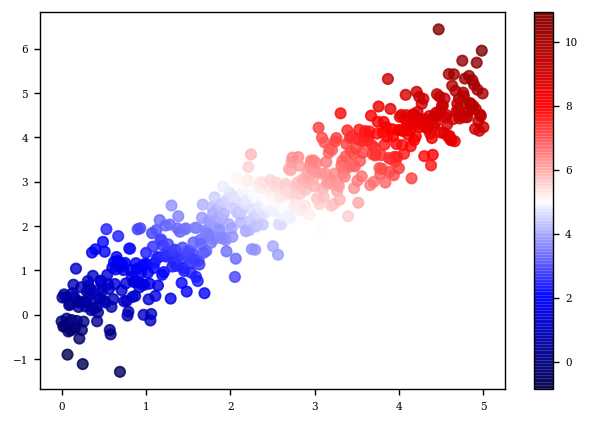

In [3]:
x1 = np.linspace(0,5, 500)
x2 = x1 + np.random.normal(loc=0.0, scale=0.5, size=500)
y = x1+x2
#y = np.where((x1 + x2) > 5, 1, 0)

X = np.stack([x1, x2], axis=-1)

df = pd.DataFrame(X, columns = ['X1', 'X2'])

plt.figure(dpi=125)
plt.scatter(x1,x2, c=y, cmap='seismic', alpha=0.8)
plt.colorbar()

In [4]:
print('\nCorrelation Matrix')
print(df.corr())


Correlation Matrix
          X1        X2
X1  1.000000  0.942468
X2  0.942468  1.000000


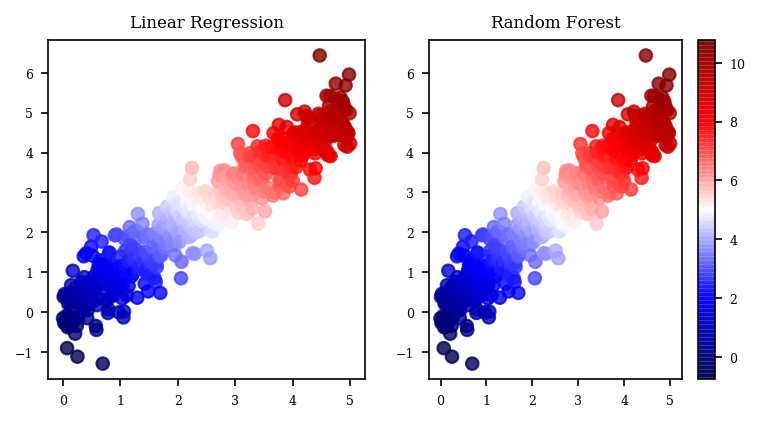

In [5]:
#lr = LogisticRegression(C=1, n_jobs=9)
lr = LinearRegression()
lr.fit(X, y)

rf = RandomForestRegressor(random_state=42, n_jobs=9)
rf.fit(X, y)

model_objs = [lr, rf]
model_names = ['Linear Regression','Random Forest']

fig, axes = plt.subplots(ncols=2, figsize=(6,3), dpi=150)

for ax, clf, name in zip(axes, model_objs, model_names):
    #sca = ax.scatter(x1,x2, c=clf.predict_proba(X)[:,1]*100., cmap='seismic', alpha=0.8)
    sca = ax.scatter(x1,x2, c=clf.predict(X), cmap='seismic', alpha=0.8)
    ax.set_title(name)
plt.colorbar(sca)

In [6]:
myInterpreter = mintpy.InterpretToolkit(model=model_objs,
                                 model_names=model_names,
                                 examples=df,
                                 targets=y,
                                 model_output='probability'
                                )

Using 2 processors...


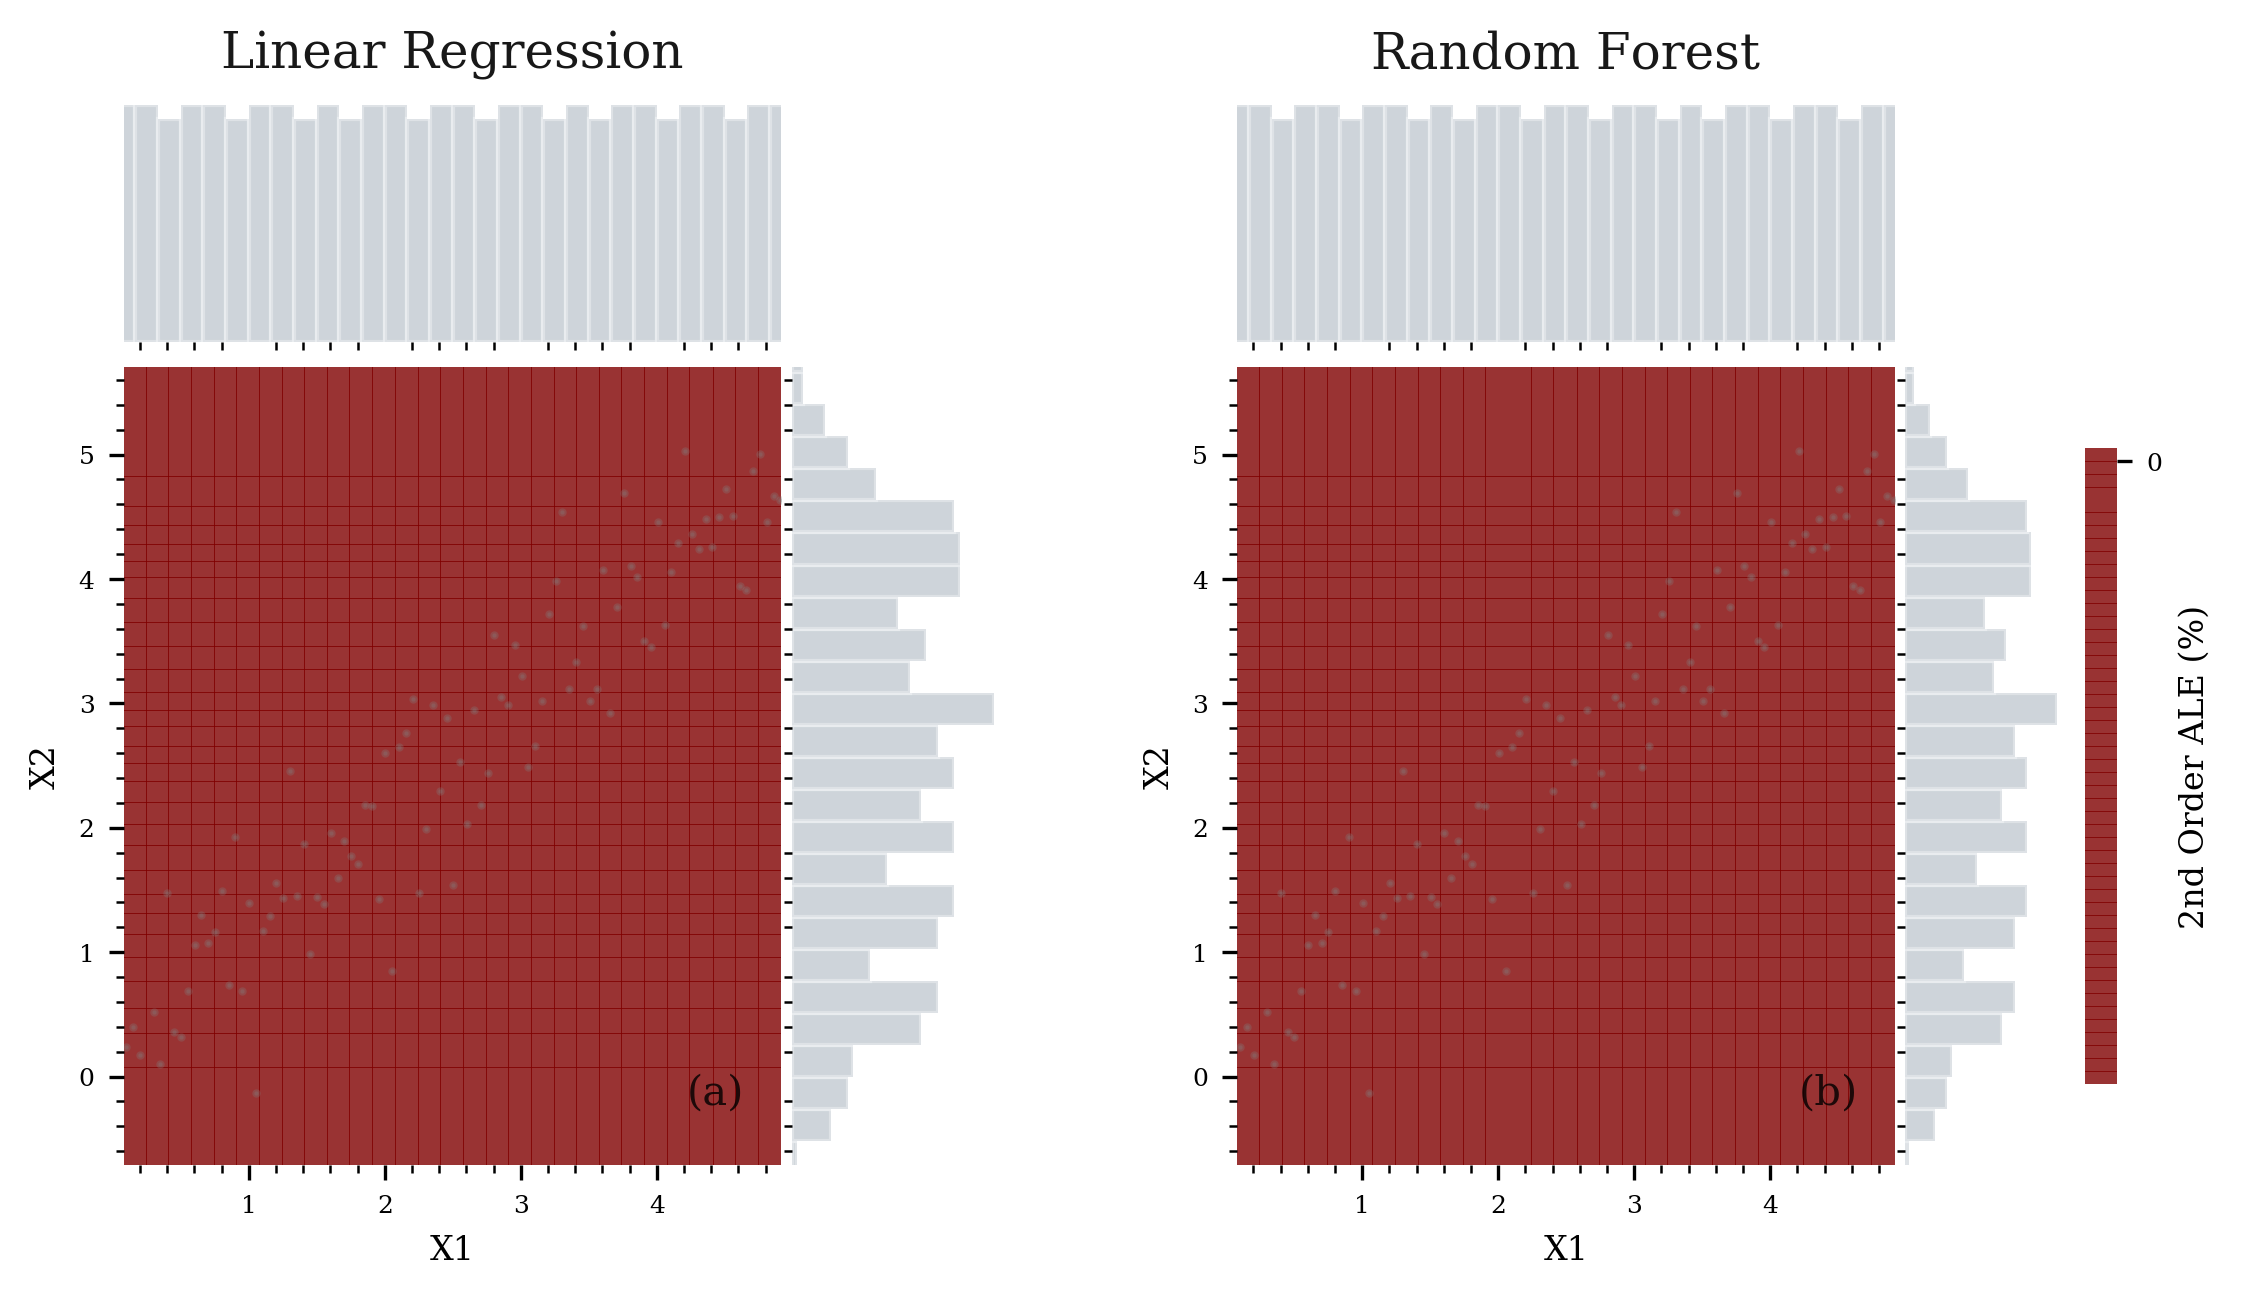

In [7]:
myInterpreter = mintpy.InterpretToolkit(model=model_objs,
                                 model_names=model_names,
                                 examples=df,
                                 targets=y,
                                 model_output='raw'
                                )
results = myInterpreter.calc_ale(features=('X1', 'X2'), 
                                 nbootstrap=1, 
                                 subsample=1.0, 
                                 njobs=2, 
                                 nbins=30
                                )

fig, axes = myInterpreter.plot_ale()
#print(100.*np.mean(clf.predict(X)))

Using 2 processors...


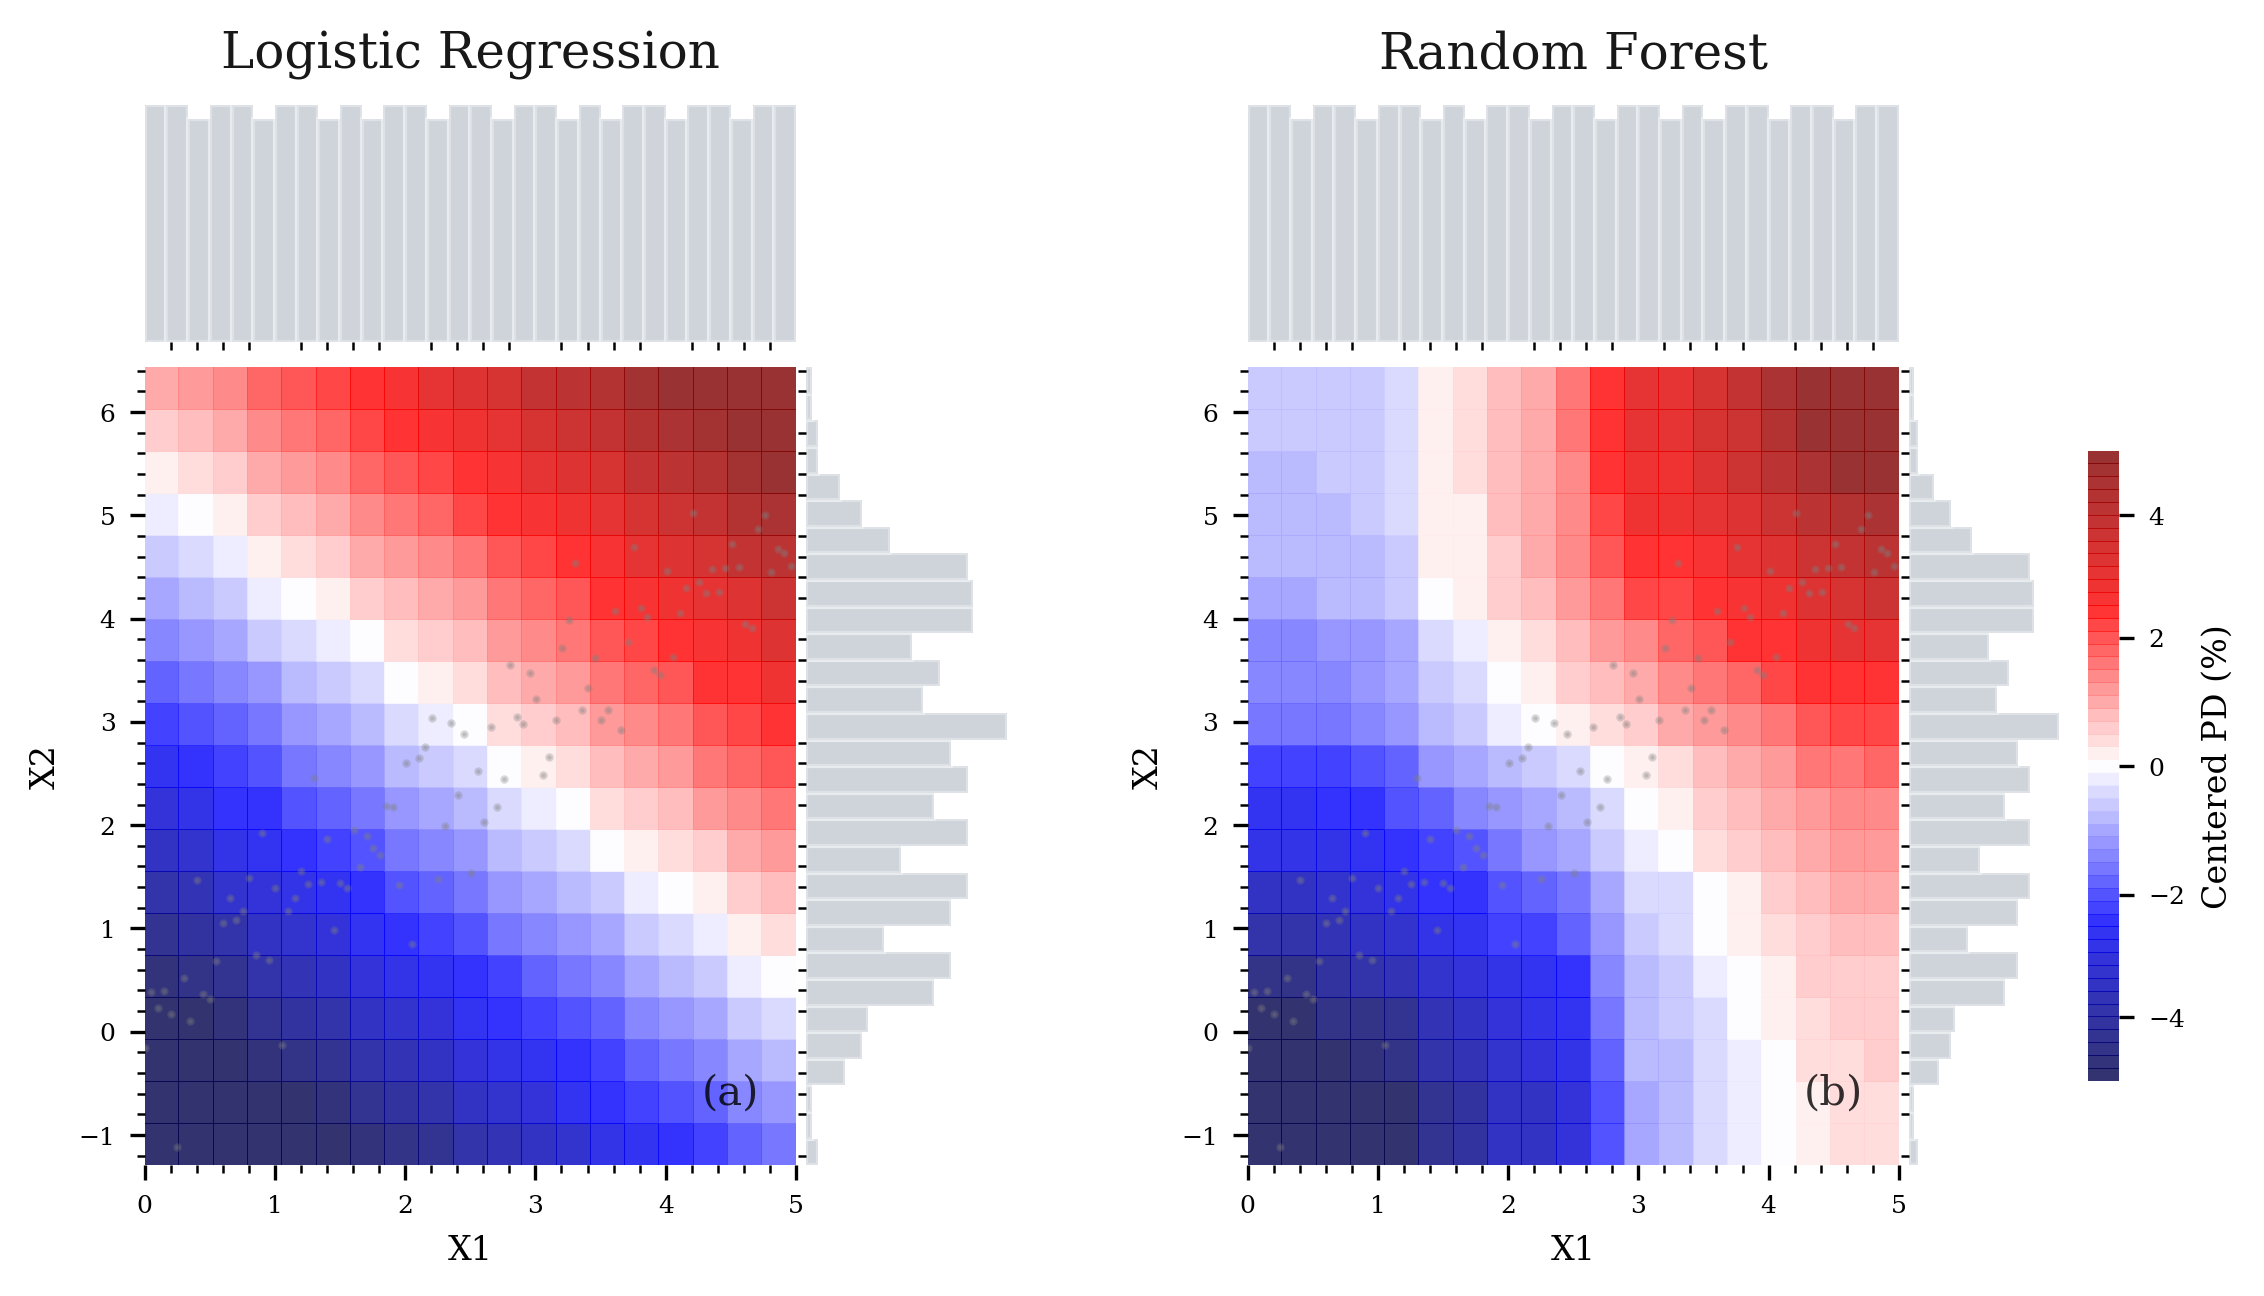

In [8]:
myInterpreter = mintpy.InterpretToolkit(model=[lr, rf],
                                 model_names=['Logistic Regression','Random Forest'],
                                 examples=df,
                                 targets=y,
                                 model_output='raw'
                                )
results = myInterpreter.calc_pd( features=('X1', 'X2'), 
                                 nbootstrap=3, 
                                 subsample=1.0, 
                                 njobs=2, 
                                 nbins=20
                                )

fig, axes = myInterpreter.plot_pd()

Using 2 processors...
504.2690975384646


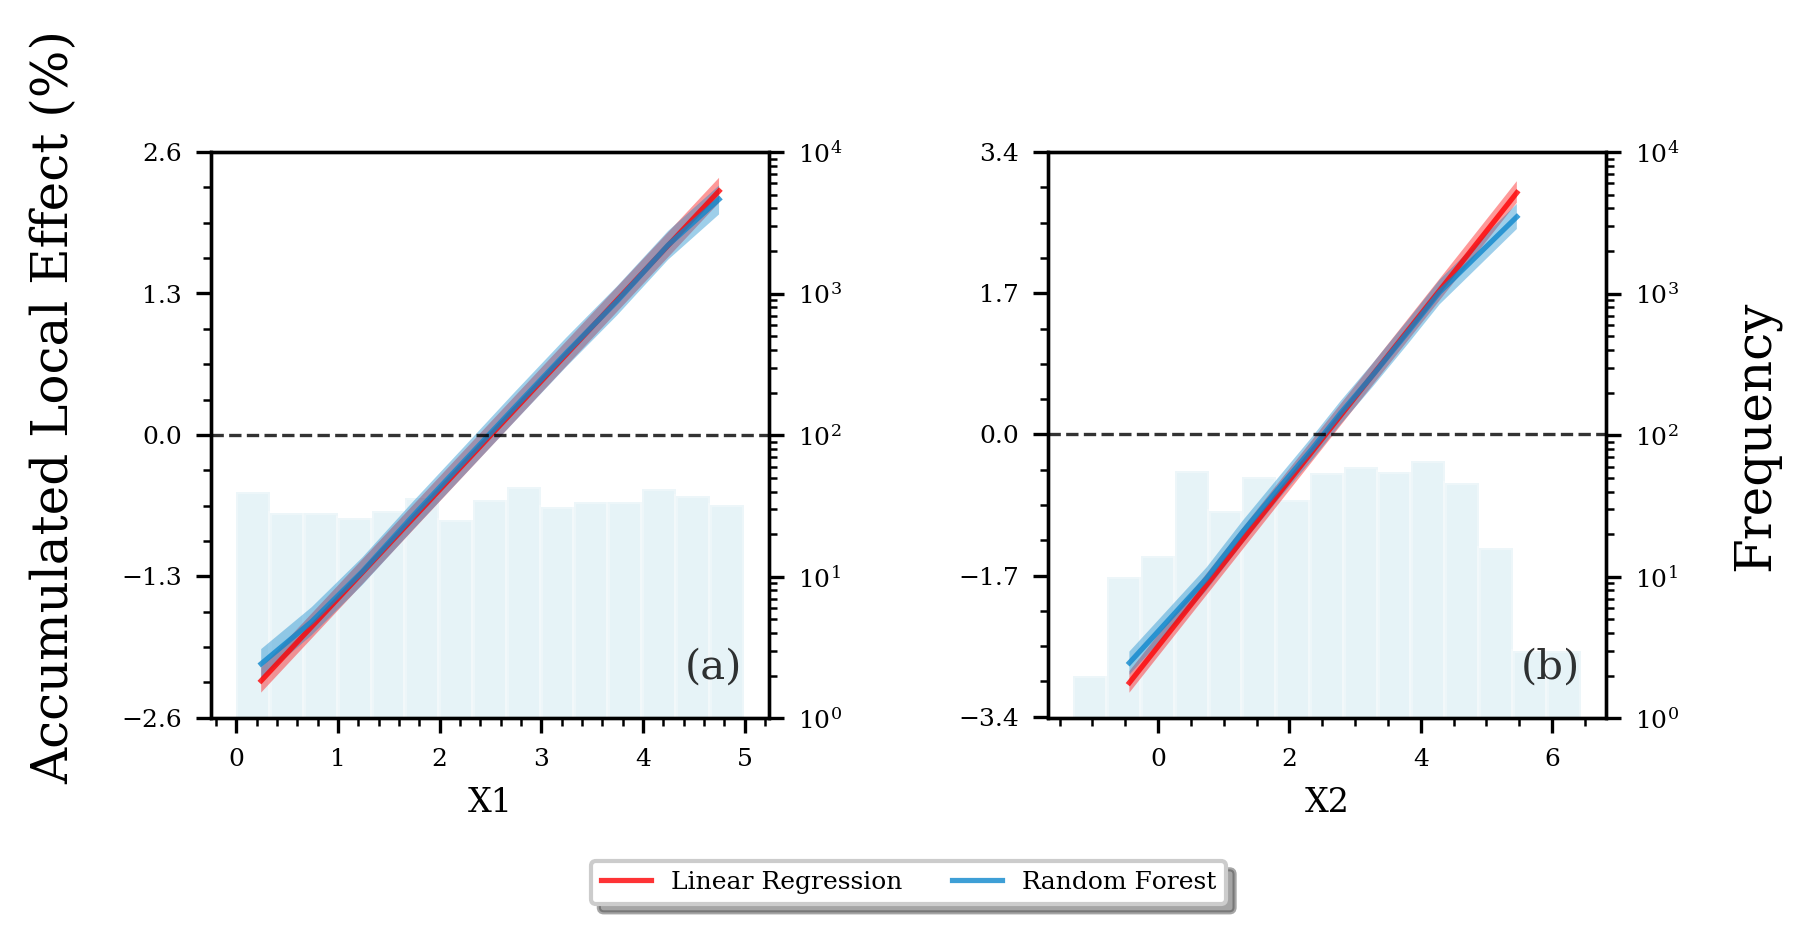

In [9]:
myInterpreter = mintpy.InterpretToolkit(model=model_objs,
                                 model_names=model_names,
                                 examples=df,
                                 targets=y,
                                 model_output='raw'
                                )

results = myInterpreter.calc_ale(features=['X1', 'X2'], 
                                 nbootstrap=100, 
                                 subsample=1.0, 
                                 njobs=2, 
                                 nbins=10
                                )

fig, axes = myInterpreter.plot_ale()
print(100.*np.mean(clf.predict(X)))

Performing random sampling (N=1000) to subset the data for the background dataset...
trying TreeExplainer...


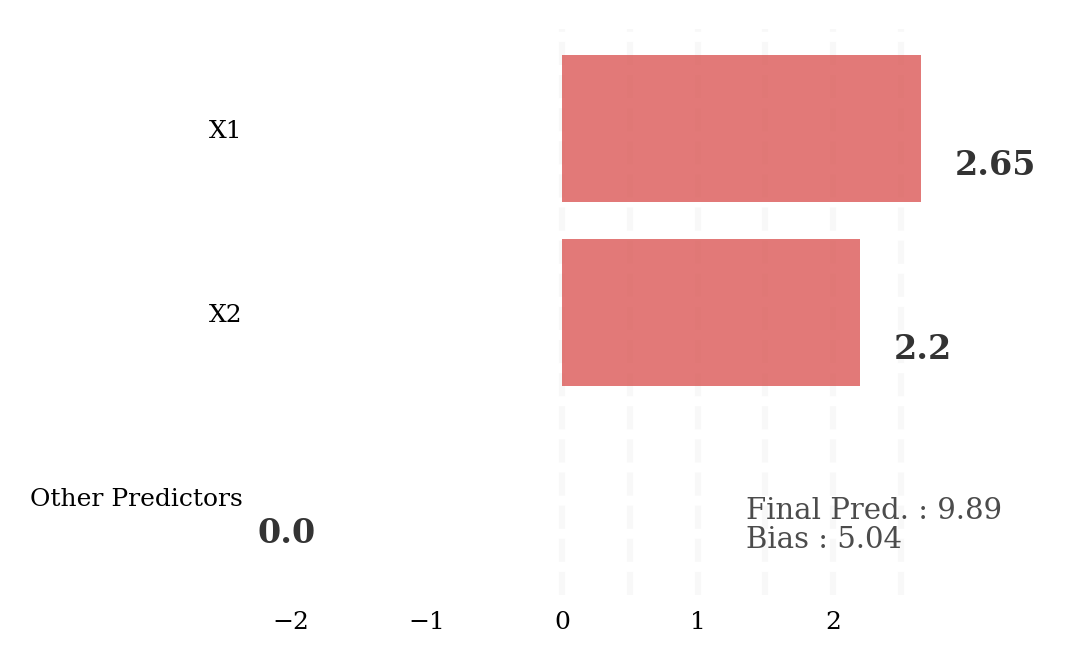

In [11]:
single_example = np.array([[5], [5]])
myInterpreter = mintpy.InterpretToolkit(model=[rf],
                                 model_names=['Random Forest'],
                                 examples=single_example.reshape(1,-1),
                                 targets=y,
                                 feature_names = ['X1', 'X2'],
                                 model_output = 'raw'
                                )

results = myInterpreter.calc_contributions(method='shap', 
                                           data_for_shap=X, 
                                           performance_based=False, 
                                           shap_sample_size=1000)

fig = myInterpreter.plot_contributions()

In [13]:
import shap
examples_subset = shap.sample(df, 500, random_state=42)
myInterpreter = mintpy.InterpretToolkit(model=model_objs[1], 
                                 model_names=model_names[1],
                                 examples=examples_subset, 
                                 targets=y,
                                 model_output='raw'
                                )

features = ['X1', 'X2']
myInterpreter.plot_shap(features=features,
                        plot_type='dependence', 
                        data_for_shap=df, 
                        subsample_size=100,
                        performance_based=False
                       )

Performing random sampling (N=100) to subset the data for the background dataset...
trying TreeExplainer...
TreeExplainer failed, starting KernelExplainer...


Traceback (most recent call last):
  File "/Users/monte.flora/mintpy/mintpy/main/local_interpret.py", line 160, in _get_shap_values
    contributions = explainer.shap_values(examples)
  File "/Users/monte.flora/opt/miniconda3/envs/deep/lib/python3.6/site-packages/shap/explainers/tree.py", line 344, in shap_values
    self.assert_additivity(out, self.model.predict(X))
  File "/Users/monte.flora/opt/miniconda3/envs/deep/lib/python3.6/site-packages/shap/explainers/tree.py", line 469, in assert_additivity
    check_sum(self.expected_value + phi.sum(-1), model_output)
  File "/Users/monte.flora/opt/miniconda3/envs/deep/lib/python3.6/site-packages/shap/explainers/tree.py", line 463, in check_sum
    raise SHAPError(err_msg)
shap.common.SHAPError: Additivity check failed in TreeExplainer! Please ensure the data matrix you passed to the explainer is the same shape that the model was trained on. If your data shape is correct then please report this on GitHub. This check failed because for one o

UnboundLocalError: local variable 'func' referenced before assignment